In [1]:
from keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169009152/169001437 [==============================] - 11s 0us/step


In [2]:
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
X_train[:2]

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [3]:
from keras.utils import to_categorical

y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
y_train.shape

(50000, 100)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)

In [11]:
X_train.shape, X_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [20]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')
X_valid_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = X_train_datagen.flow(X_train, y_train, batch_size=1000)
valid_generator = X_valid_datagen.flow(X_valid, y_valid, batch_size=1000)

In [13]:
print(type(X_train_datagen))

<class 'tensorflow.python.keras.preprocessing.image.ImageDataGenerator'>


In [16]:
print(type(y_train))

<class 'numpy.ndarray'>


In [21]:

from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
#model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [30]:
print(40000/1000)
print(10000/1000)

40.0
10.0


In [22]:
%%time
Hist = model.fit(train_generator, steps_per_epoch=40 ,
                       epochs = 50,
                       batch_size = 128,
                       validation_data=valid_generator, validation_steps=10)

Epoch 1/50
40/40 [==============================] - 18s 438ms/step - loss: 4.5549 - accuracy: 0.0170 - val_loss: 4.3117 - val_accuracy: 0.0326
Epoch 2/50
40/40 [==============================] - 17s 430ms/step - loss: 4.3254 - accuracy: 0.0383 - val_loss: 4.0882 - val_accuracy: 0.0707
Epoch 3/50
40/40 [==============================] - 17s 427ms/step - loss: 4.1276 - accuracy: 0.0630 - val_loss: 3.9084 - val_accuracy: 0.0984
Epoch 4/50
40/40 [==============================] - 17s 430ms/step - loss: 3.9962 - accuracy: 0.0799 - val_loss: 3.8416 - val_accuracy: 0.1091
Epoch 5/50
40/40 [==============================] - 17s 428ms/step - loss: 3.9075 - accuracy: 0.0919 - val_loss: 3.7582 - val_accuracy: 0.1199
Epoch 6/50
40/40 [==============================] - 17s 427ms/step - loss: 3.8283 - accuracy: 0.1059 - val_loss: 3.6295 - val_accuracy: 0.1494
Epoch 7/50
40/40 [==============================] - 17s 430ms/step - loss: 3.7635 - accuracy: 0.1157 - val_loss: 3.5363 - val_accuracy: 0.1603

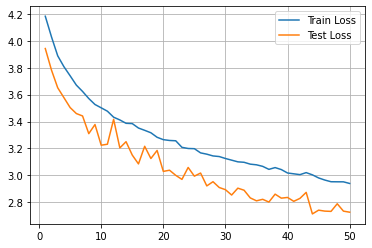

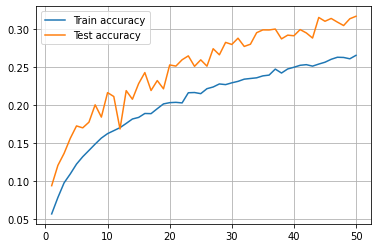

In [34]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Train Loss', 'Test Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['Train accuracy', 'Test accuracy'])
plt.grid()
plt.show()

In [36]:
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = test_datagen.flow(X_test, y_test, batch_size=1000)

loss, accuracy = model.evaluate(test_generator, steps=10)
loss, accuracy

22/22 [==============================] - 1s 26ms/step - loss: 2.7390 - accuracy: 0.3118


(2.7389678955078125, 0.3118000030517578)

# fit

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale= 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')
train_generator = datagen.flow(X_train, y_train, batch_size=1000)
valid_generator = datagen.flow(X_valid, y_valid, batch_size=1000)

In [16]:
X_train[0]

array([[[162, 149, 130],
        [161, 150, 131],
        [161, 152, 132],
        ...,
        [168, 156, 140],
        [166, 154, 138],
        [166, 153, 137]],

       [[113, 141, 137],
        [114, 140, 137],
        [118, 142, 139],
        ...,
        [124, 154, 154],
        [126, 156, 156],
        [130, 159, 158]],

       [[ 63, 114, 115],
        [ 67, 113, 115],
        [ 71, 113, 116],
        ...,
        [121, 162, 172],
        [121, 163, 173],
        [124, 164, 173]],

       ...,

       [[224, 224, 224],
        [224, 224, 224],
        [228, 228, 228],
        ...,
        [248, 248, 248],
        [249, 249, 249],
        [249, 249, 249]],

       [[225, 225, 225],
        [227, 227, 227],
        [230, 230, 230],
        ...,
        [250, 250, 250],
        [251, 251, 251],
        [251, 251, 251]],

       [[223, 223, 223],
        [224, 224, 224],
        [227, 227, 227],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]]

In [18]:

from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
#model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [19]:
%%time
Hist = model.fit(train_generator, steps_per_epoch=40 ,
                       epochs = 50,
                       validation_data=valid_generator, validation_steps=10)

Epoch 1/50
40/40 [==============================] - 51s 527ms/step - loss: 4.5607 - accuracy: 0.0151 - val_loss: 4.3517 - val_accuracy: 0.0332
Epoch 2/50
40/40 [==============================] - 21s 523ms/step - loss: 4.3349 - accuracy: 0.0366 - val_loss: 4.1307 - val_accuracy: 0.0669
Epoch 3/50
40/40 [==============================] - 21s 529ms/step - loss: 4.1532 - accuracy: 0.0608 - val_loss: 3.9817 - val_accuracy: 0.0868
Epoch 4/50
40/40 [==============================] - 21s 524ms/step - loss: 4.0249 - accuracy: 0.0775 - val_loss: 3.8737 - val_accuracy: 0.1031
Epoch 5/50
40/40 [==============================] - 21s 520ms/step - loss: 3.9428 - accuracy: 0.0874 - val_loss: 3.7985 - val_accuracy: 0.1160
Epoch 6/50
40/40 [==============================] - 21s 522ms/step - loss: 3.8614 - accuracy: 0.0996 - val_loss: 3.7111 - val_accuracy: 0.1330
Epoch 7/50
40/40 [==============================] - 21s 522ms/step - loss: 3.7777 - accuracy: 0.1159 - val_loss: 3.6495 - val_accuracy: 0.1406

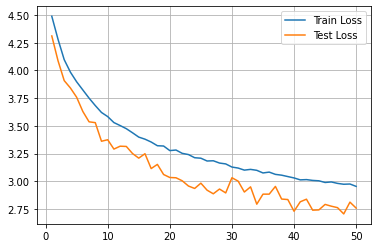

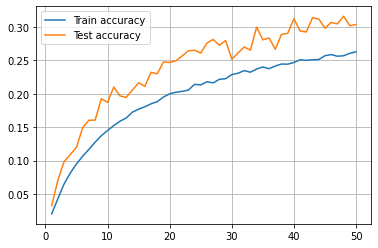

In [23]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Train Loss', 'Test Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['Train accuracy', 'Test accuracy'])
plt.grid()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = test_datagen.flow(X_test, y_test, batch_size=1000)

loss, accuracy = model.evaluate(test_generator, steps=10)
loss, accuracy

22/22 [==============================] - 1s 26ms/step - loss: 2.7390 - accuracy: 0.3118


(2.7389678955078125, 0.3118000030517578)